In [205]:
#import necessary libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [206]:
#load data into a dataframe using Pandas
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [207]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


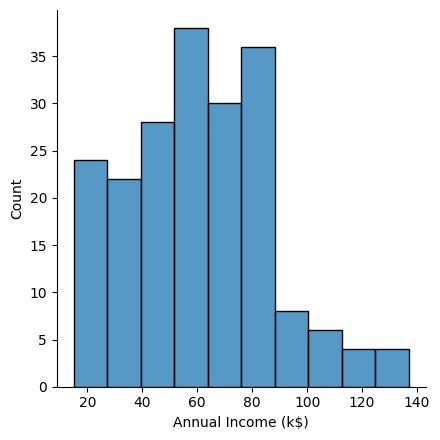

In [208]:
#Univariate Analysis

#Carry out exploratory analysis on the columns
sns.displot(data['Annual Income (k$)'], height=4.5);


In [209]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [210]:
columns = data[['Age', 'Annual Income (k$)','Spending Score (1-100)']]
columns

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


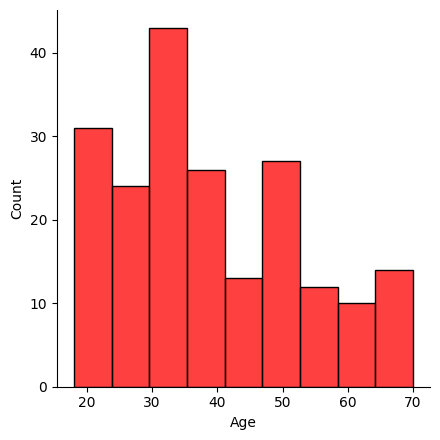

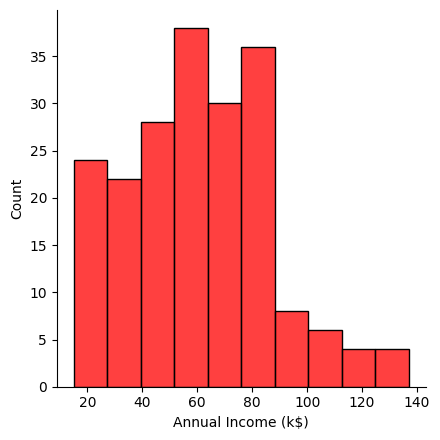

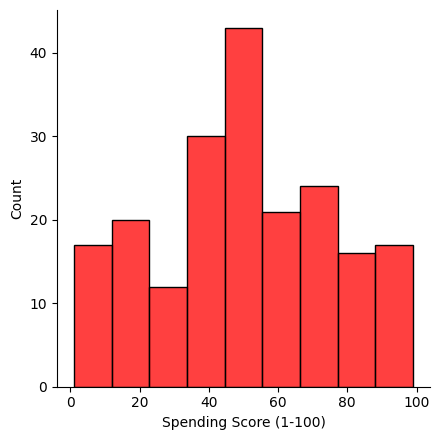

In [211]:
#create a loop to interate through the columns and create exploratory analysis on each of them
for i in columns:
    sns.displot(data[i], height=4.5, color='r') 

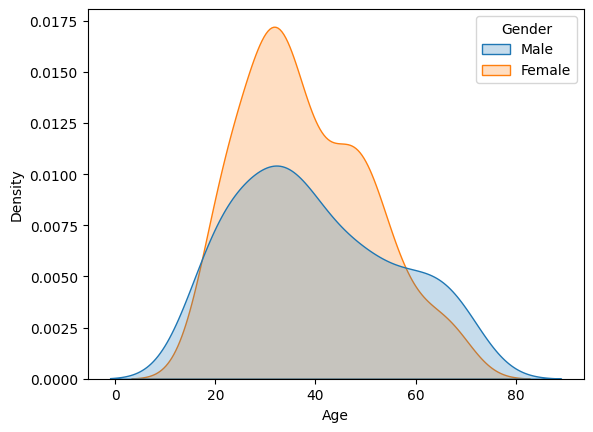

In [212]:
#Using the Gender data to drill the dataset to further cary out exploratory data analysis

sns.kdeplot(x=data['Age'], color='g', fill=True, hue=data['Gender']);

In [213]:
data.columns

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


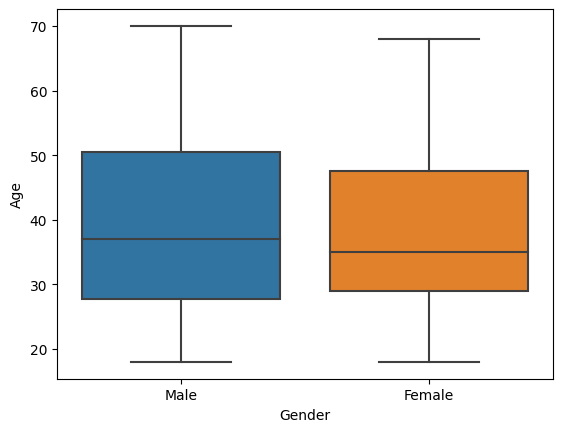

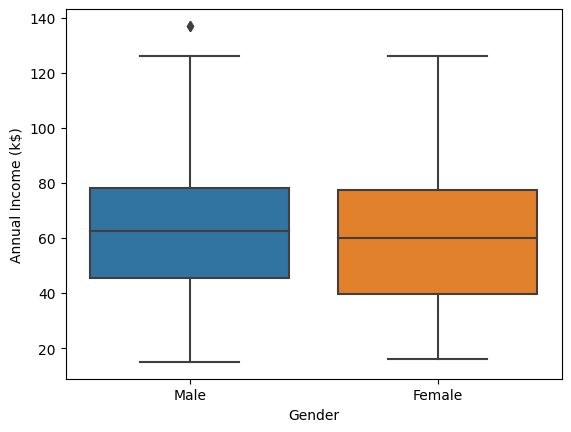

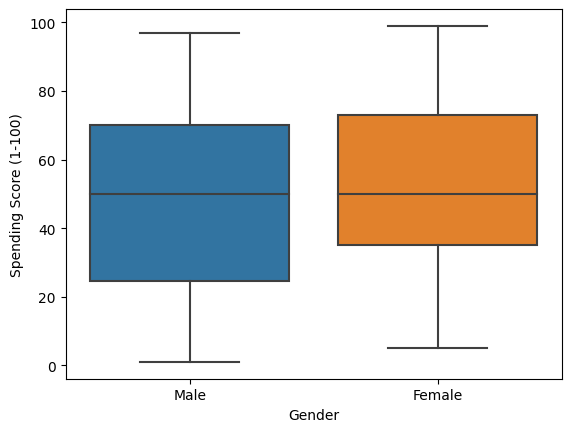

In [214]:
# create a boxplot to create individual plots for male and female gender
for i in columns:
    plt.figure()
    sns.boxplot(data=data, x='Gender', y=data[i]);

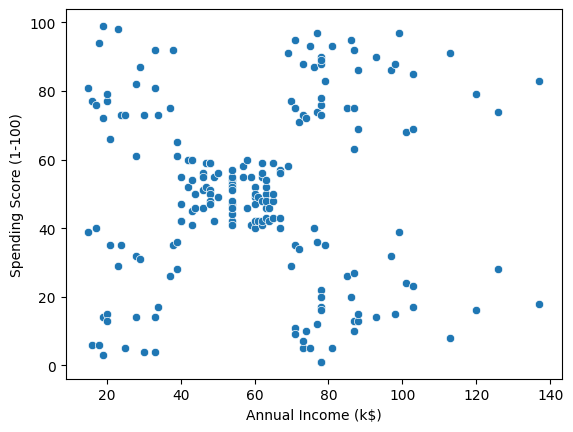

In [215]:
#Bivariate Analysis
# using a scatter plot of annual income against spending score to see our clusters
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)');

In [216]:
# drop columns Customer ID and Gender to explore correlation between age, annual income, and spending score
data = data.drop('Gender', axis=1)
data


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [217]:
correlation = data.corr()
correlation

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


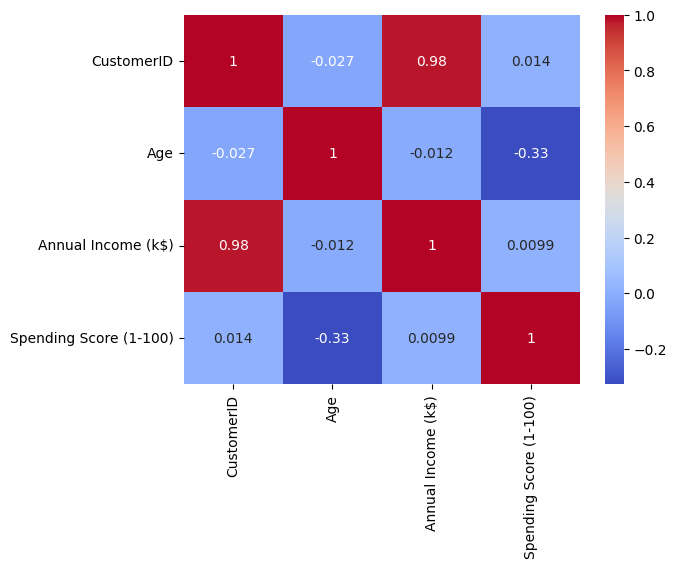

In [218]:
# visulaize the correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm',);

In [219]:
from sklearn.cluster import KMeans

In [220]:
# Univariate Clustering
# create an algorithm and fit Annual Income into it
custering1 = KMeans(n_clusters=6)
custering1.fit(data[['Annual Income (k$)']])
custering1.labels_

C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2])

In [221]:
# add outptut to the existing dataframe
data['Income Clusters'] = custering1.labels_
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Clusters
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,2
196,197,45,126,28,2
197,198,32,126,74,2
198,199,32,137,18,2


In [222]:
data['Income Clusters'].value_counts()

Income Clusters
0    46
3    44
5    42
1    32
4    28
2     8
Name: count, dtype: int64

In [223]:
# create a loop to find the right amount of clusters to use with the Inertia method
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)


C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

In [224]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3941.4163614163635,
 2827.308424908427,
 2234.450395682748,
 1737.1612554112562]

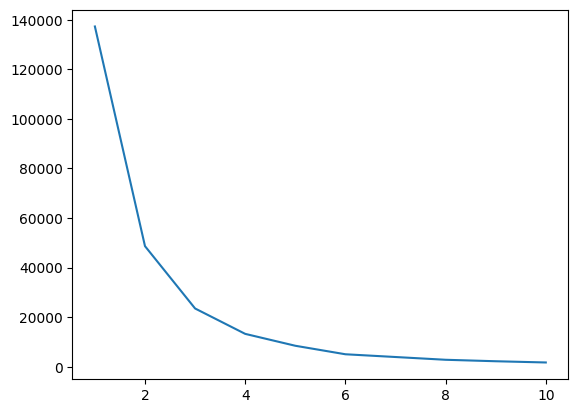

In [225]:
# using the elbow method to suggest best number of clusters to use for the KMeans Algorithm
plt.plot(range(1,11), inertia_scores);

In [226]:
custering1 = KMeans(n_clusters=3)
custering1.fit(data[['Annual Income (k$)']])
custering1.labels_

C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [227]:
# add outptut to the existing dataframe
data['Income Clusters'] = custering1.labels_
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Clusters
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,2
196,197,45,126,28,2
197,198,32,126,74,2
198,199,32,137,18,2


In [228]:
data['Income Clusters'].value_counts()

Income Clusters
0    90
1    74
2    36
Name: count, dtype: int64

In [229]:
data.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Clusters'],
      dtype='object')

In [230]:
# Bivariate clustering
clustering2 = KMeans(n_clusters=5)
clustering2.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data['Income and Spending Clusters'] = clustering2.labels_
data



C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Income and Spending Clusters
0,1,19,15,39,1,1
1,2,21,15,81,1,4
2,3,20,16,6,1,1
3,4,23,16,77,1,4
4,5,31,17,40,1,1
...,...,...,...,...,...,...
195,196,35,120,79,2,0
196,197,45,126,28,2,3
197,198,32,126,74,2,0
198,199,32,137,18,2,3


C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

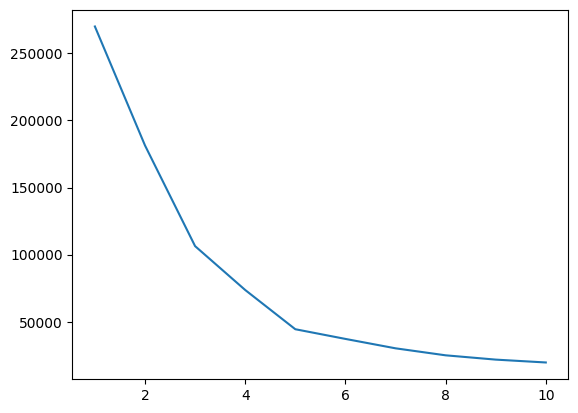

In [231]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2);

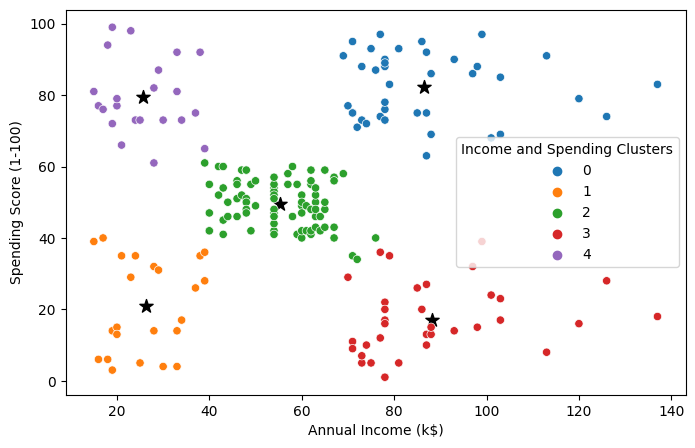

In [232]:
centers = clustering2.cluster_centers_
center_marks = pd.DataFrame(centers)
center_marks.columns = ['x', 'y']


plt.figure(figsize=(8,5))
plt.scatter(x=center_marks['x'], y=center_marks['y'], s=100, c='black', marker='*')
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income and Spending Clusters' ,palette='tab10');
plt.savefig('Clustering.png')

In [233]:
data.groupby('Income and Spending Clusters')[data.columns ].mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Income and Spending Clusters
Income and Spending Clusters,,,,,,
0,162.000000,32.692308,86.538462,82.128205,0.923077,0.0
1,23.000000,45.217391,26.304348,20.913043,1.000000,1.0
2,86.320988,42.716049,55.296296,49.518519,0.358025,2.0
3,164.371429,41.114286,88.200000,17.114286,1.028571,3.0
4,23.090909,25.272727,25.727273,79.363636,1.000000,4.0


In [234]:
# save the dataframe
data.to_csv('Clustering.csv')
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Income and Spending Clusters
0,1,19,15,39,1,1
1,2,21,15,81,1,4
2,3,20,16,6,1,1
3,4,23,16,77,1,4
4,5,31,17,40,1,1
...,...,...,...,...,...,...
195,196,35,120,79,2,0
196,197,45,126,28,2,3
197,198,32,126,74,2,0
198,199,32,137,18,2,3
